## 6.4.1 Supervised Machine Learning - Regression

## Contents List: 

1) Import Data and Libraries
2) Cleaning Data
3) Data Prep for Regression Analysis
4) Regression Analysis
5) Summary of Results

## 1. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [4]:
# Import original data set "dairy_wrangled.csv"
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

## 2. Cleaning Data

In [5]:
df.columns

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,0,Telangana,310.84,96,Medium,2/17/22,Ice Cream,Dodla Dairy,222.40,85.72,...,12/27/21,1/21/22,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,1,Uttar Pradesh,19.19,44,Large,12/1/21,Milk,Amul,687.48,42.61,...,10/3/21,10/25/21,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,2,Tamil Nadu,581.69,24,Medium,2/28/22,Yogurt,Dodla Dairy,503.48,36.50,...,1/14/22,2/13/22,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,3,Telangana,908.00,89,Small,6/9/19,Cheese,Britannia Industries,823.36,26.52,...,5/15/19,7/26/19,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,4,Maharashtra,861.95,21,Medium,12/14/20,Buttermilk,Mother Dairy,147.77,83.85,...,10/17/20,10/28/20,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
5,5,Telangana,87.64,51,Medium,1/7/19,Curd,Raj,593.92,85.54,...,1/3/19,1/8/19,74,84.75,6271.50,Gujarat,Retail,519,55.60,139.59
6,6,Karnataka,73.28,74,Small,8/5/22,Cheese,Dynamix Dairies,757.14,36.83,...,6/14/22,9/5/22,410,32.66,13390.60,Karnataka,Online,347,49.82,105.86
7,7,Bihar,67.61,77,Medium,2/14/19,Paneer,Mother Dairy,203.36,29.08,...,1/6/19,1/20/19,15,29.09,436.35,Haryana,Online,188,10.90,25.14
8,8,West Bengal,72.31,76,Medium,8/2/20,Curd,Raj,949.12,22.79,...,6/6/20,6/12/20,860,24.77,21302.20,Jharkhand,Wholesale,89,85.71,32.03
9,9,Telangana,413.24,36,Large,3/4/22,Buttermilk,Mother Dairy,385.64,42.08,...,2/3/22,2/12/22,108,46.15,4984.20,Tamil Nadu,Retail,277,93.61,66.26


In [7]:
df.shape

(4325, 23)

In [8]:
# Drop column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.shape

(4325, 22)

In [10]:
df.head(2)

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2/17/22,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,...,12/27/21,1/21/22,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,12/1/21,Milk,Amul,687.48,42.61,29293.5228,...,10/3/21,10/25/21,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10


In [11]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

### Missing Values

In [12]:
# Check for missing values

df.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

#### No missing values

### Duplicates Check

In [13]:
dups = df.duplicated()

In [14]:
dups.shape

(4325,)

#### No duplicates

## 3. Data Prep for Regression Analysis

### Products

Hypothesis 1

- The price per unit of different products is influenced by their shelf life.

In [15]:
# Initial analysis

from scipy.stats import chi2_contingency

# Contingency table
contingency_table_products1 = pd.crosstab(df['Price per Unit'], df['Shelf Life (days)'])
print(contingency_table_products1)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table_products1)
print(f"Chi2: {chi2}, p-value: {p}")

Shelf Life (days)  1    2    5    6    7    8    9    10   11   12   ...  141  \
Price per Unit                                                       ...        
10.03                0    0    0    0    0    0    0    0    0    0  ...    0   
10.05                0    0    0    0    0    0    0    0    0    0  ...    0   
10.09                1    0    0    0    0    0    0    0    0    0  ...    0   
10.11                0    0    0    0    0    0    0    1    0    0  ...    0   
10.15                0    0    0    0    0    0    0    0    0    0  ...    0   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99.78                0    0    0    0    2    0    0    0    0    0  ...    0   
99.84                0    0    0    0    0    0    0    0    0    0  ...    0   
99.94                0    0    0    0    0    0    0    0    0    0  ...    0   
99.96                0    0    0    0    0    0    0    0    0    0  ...    0   
99.99                0    0 

#### The p-value (0.0000494) is much smaller than the significance level (0.05).
#### Therefore, we reject the null hypothesis.
#### There is strong evidence to suggest a significant association between Price per Unit and Shelf Life (days) at the 0.05 significance level.

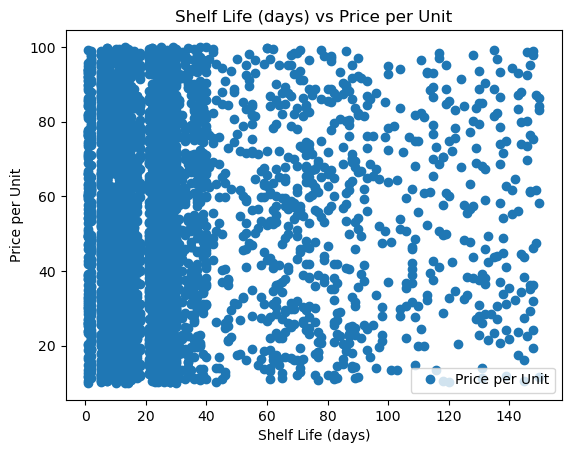

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Shelf Life (days)', y='Price per Unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Shelf Life (days) vs Price per Unit')  
plt.xlabel('Shelf Life (days)')  
plt.ylabel('Price per Unit')  
plt.show()

In [17]:
# The scatterplot does not indicate a linear relationship

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Shelf Life (days)'].values.reshape(-1,1)
y = df['Price per Unit'].values.reshape(-1,1)

In [19]:
X

array([[25],
       [22],
       [30],
       ...,
       [ 7],
       [ 7],
       [ 1]])

In [20]:
y

array([[85.72],
       [42.61],
       [36.5 ],
       ...,
       [92.61],
       [15.3 ],
       [49.31]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

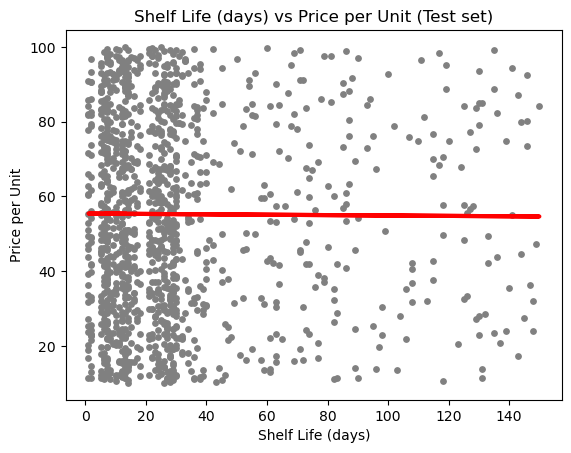

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Shelf Life (days) vs Price per Unit (Test set)')
plot_test.xlabel('Shelf Life (days)')
plot_test.ylabel('Price per Unit')
plot_test.show()

In [26]:
plot_test.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_test1.png'))

<Figure size 640x480 with 0 Axes>

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00521508]]
Mean squared error:  685.6908049732003
R2 score:  -0.0043622471815221164


### Analysis:
#### Slope: as shelf life rises, the price per unit sightly drops at a degress of .0052.
#### MSE: the MSE is extremely large, meaning the regression line is not accurate.
#### R2 score: the very small, negative score indicates the model does not explain the variance in the data.

In [29]:
y_predicted

array([[55.37010595],
       [55.39618136],
       [55.1302122 ],
       ...,
       [55.39618136],
       [55.29709481],
       [55.40139644]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19.42,55.370106
1,76.09,55.396181
2,13.65,55.130212
3,18.81,55.375321
4,35.44,55.375321
5,84.30,55.250159
6,66.92,55.375321
7,43.81,55.354461
8,11.60,55.239729
9,97.53,55.276234


#### This model does not result in accuratley predicting the actual data.

### Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00521508]]
Mean squared error:  672.240332485264
R2 score:  3.575764442453888e-05


### Analysis:
#### The results for slope and MSE are very close to the test set,  and the R2 score is even smaller than the test set results. 

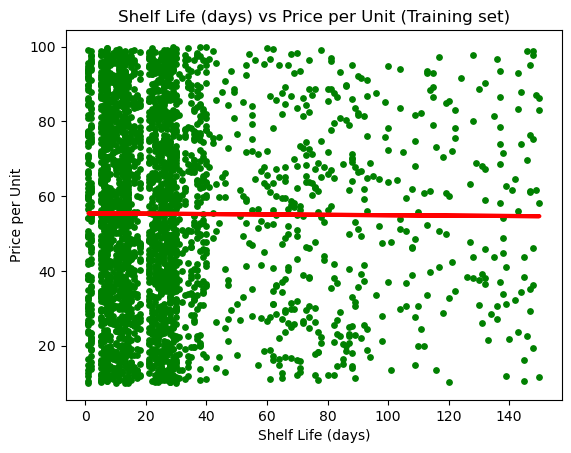

In [38]:
# Visualizing the training set results.

plot_test_training = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Shelf Life (days) vs Price per Unit (Training set)')
plot_test.xlabel('Shelf Life (days)')
plot_test.ylabel('Price per Unit')
plot_test.show()

In [39]:
plot_test_training.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_training1.png'))

<Figure size 640x480 with 0 Axes>

### Alternative method

In [42]:
import statsmodels.api as sm

# Regression analysis
X = df[['Shelf Life (days)'] + [col for col in data.columns if col.startswith('Price per Unit')]]
y = df['Price per Unit']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

KeyError: 'Price per Unit'

### Analysis
#### The regression model does not find a meaningful relationship between Price per Unit and Shelf Life (days).
#### The very low R-squared and high p-values suggest that Shelf Life (days) is not a significant predictor of Price per Unit.
#### The residuals are not normally distributed, as indicated by the Omnibus and Jarque-Bera tests.

In [ ]:
# Examining residuals

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `model` is your OLS regression result
residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

### Analysis
#### The differences between the observed values (actual data points) and the predicted values (from the regression model) do not follow a normal (Gaussian) distribution. In a normal distribution, the residuals should cluster around the mean (usually zero in regression models) and have a symmetrical bell-shaped curve.
#### This could indicate there is a non linear relationship between the variables.

# 5. Summary of Results

### 1) Contingency Table and Chi-square test
#### Chi-Square (498,040.04) results is a very large value, indicating a substantial difference between the observed and expected frequencies.
#### The p-value (0.0000494) is much smaller than the significance level (0.05); therefore, we rejected the null hypothesis.
#### There is strong evidence to suggest a significant association between Price per Unit and Shelf Life (days) at the 0.05 significance level.

### 2) Scatterplot
#### The scatterplot did not indicate a linear relationship.

### 3) Regression Analysis: Test Set
#### Slope (-0.0052): as shelf life rises, the price per unit sightly drops at a degress of .0052.
#### MSE (685.69): the MSE is extremely large, meaning the regression line is not accurate.
#### R2 score (-0.0044): the very small, negative score indicates the model does not explain the variance in the data.

### 4) Regression Analysis: Training Set
#### Slope (-0.0052) is identical to the Test set
#### MSE (672.24) is very close to the Test set
#### R2 (0.0000358) is positive, unlike the Test set score, but is even smaller indicate model inaccuracy

### 5) Additional Analysis
#### The regression model does not find a meaningful relationship between Price per Unit and Shelf Life (days).
#### The very low R-squared and high p-values suggest that Shelf Life (days) is not a significant predictor of Price per Unit.
#### The residuals are not normally distributed, as indicated by the Omnibus and Jarque-Bera tests

### 6) Residuals
#### The differences between the observed values (actual data points) and the predicted values (from the regression model) do not follow a normal (Gaussian) distribution. 
#### This could indicate there is a non linear relationship between the variables.